<a href="https://colab.research.google.com/github/hargurjeet/LJMU_Thesis/blob/main/classical_ml_traning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
!git clone https://github.com/hargurjeet/LJMU_Thesis.git

Cloning into 'LJMU_Thesis'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 171 (delta 3), reused 0 (delta 0), pack-reused 160 (from 1)
Receiving objects: 100% (171/171), 32.20 MiB | 6.98 MiB/s, done.
Resolving deltas: 100% (92/92), done.
Updating files: 100% (26/26), done.


In [3]:
df = pd.read_csv('/content/LJMU_Thesis/Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot'], drop_first=True)

In [5]:
# Define features and target variable
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report: Random Forest")
print(report)

Accuracy: 0.87
Precision: 0.71
Recall: 0.58
F1 Score: 0.64
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       153
           1       0.71      0.58      0.64        38

    accuracy                           0.87       191
   macro avg       0.80      0.76      0.78       191
weighted avg       0.86      0.87      0.86       191



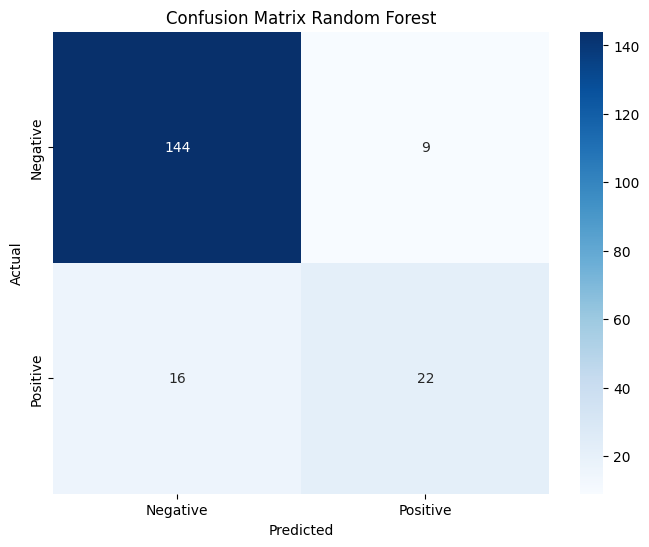

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42)

# 3. Train the Model
xgb_model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = xgb_model.predict(X_test)

# 5. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.90
Precision: 0.81
Recall: 0.66
F1 Score: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       153
           1       0.81      0.66      0.72        38

    accuracy                           0.90       191
   macro avg       0.86      0.81      0.83       191
weighted avg       0.90      0.90      0.90       191



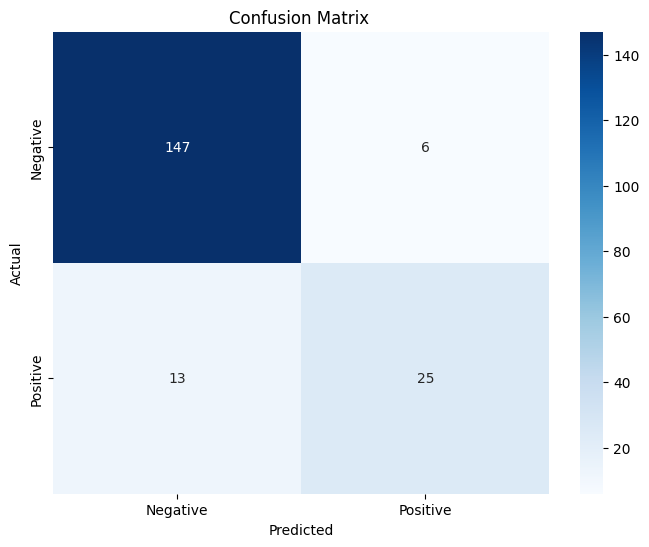

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix ')
plt.show()

## Comparing results of classical model and enrcihed models

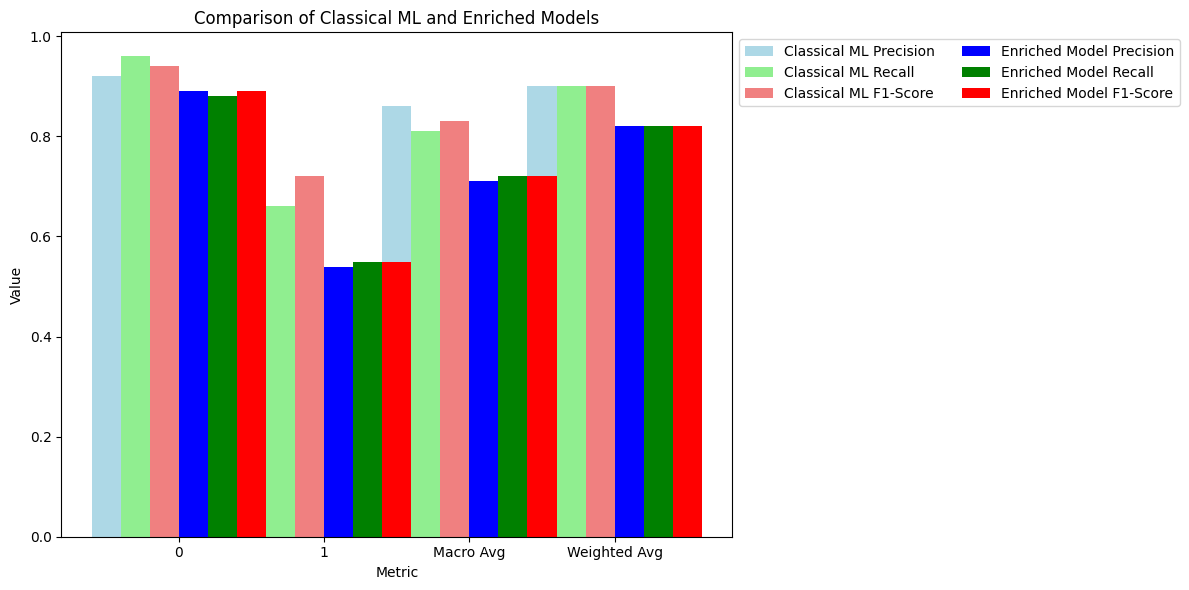

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classification report data
classical_ml_report = {
    'Class': ['0', '1', 'Macro Avg', 'Weighted Avg'],
    'Precision': [0.92, 0.81, 0.86, 0.90],
    'Recall': [0.96, 0.66, 0.81, 0.90],
    'F1-Score': [0.94, 0.72, 0.83, 0.90]
}

enriched_report = {
    'Class': ['0', '1', 'Macro Avg', 'Weighted Avg'],
    'Precision': [0.89, 0.54, 0.71, 0.82],
    'Recall': [0.88, 0.55, 0.72, 0.82],
    'F1-Score': [0.89, 0.55, 0.72, 0.82]
}

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the x-axis labels
x = np.arange(len(classical_ml_report['Class']))

# Define the width of the bars
width = 0.2

# Plot the bar chart for classical ML metrics
ax.bar(x - width, classical_ml_report['Precision'], width, label='Classical ML Precision', color='lightblue')
ax.bar(x, classical_ml_report['Recall'], width, label='Classical ML Recall', color='lightgreen')
ax.bar(x + width, classical_ml_report['F1-Score'], width, label='Classical ML F1-Score', color='lightcoral')

# Plot the bar chart for enriched model metrics
ax.bar(x + 2 * width, enriched_report['Precision'], width, label='Enriched Model Precision', color='blue')
ax.bar(x + 3 * width, enriched_report['Recall'], width, label='Enriched Model Recall', color='green')
ax.bar(x + 4 * width, enriched_report['F1-Score'], width, label='Enriched Model F1-Score', color='red')

# Set the x-axis tick labels
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(classical_ml_report['Class'])

# Add labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.set_title('Comparison of Classical ML and Enriched Models')
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)

# Display the plot
plt.tight_layout()
plt.show()